In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

model_list = [
    ['max', 'Abs', 'LPS'],
    ['max', 'Abs', 'MPLA'],
    ['max', 'Abs', 'CpG'],
    ['max', 'Lum', 'LPS'],
    ['max', 'Lum', 'MPLA'],
    ['max', 'Lum', 'cGAMP']
]

nfkb_list = [
    ['max', 'Abs', 'LPS'],
    ['max', 'Abs', 'MPLA'],
    ['max', 'Abs', 'CpG']
]

irf_list = [
    ['max', 'Lum', 'LPS'],
    ['max', 'Lum', 'MPLA'],
    ['max', 'Lum', 'cGAMP'],
]

translator = {
    'min': 'Inhibitor',
    'max': 'Enhancer',
    'Abs': 'NF-$\kappa$B',
    'Lum': 'IRF'
}

cm = {
    'LPS': 'tab:blue',
    'MPLA': 'tab:orange',
    'CpG': 'tab:green',
    'cGAMP': 'tab:red'
}

dirpath = 'C:/Users/yifen/OneDrive - The University of Chicago/Research/GPR-stop-criteria'

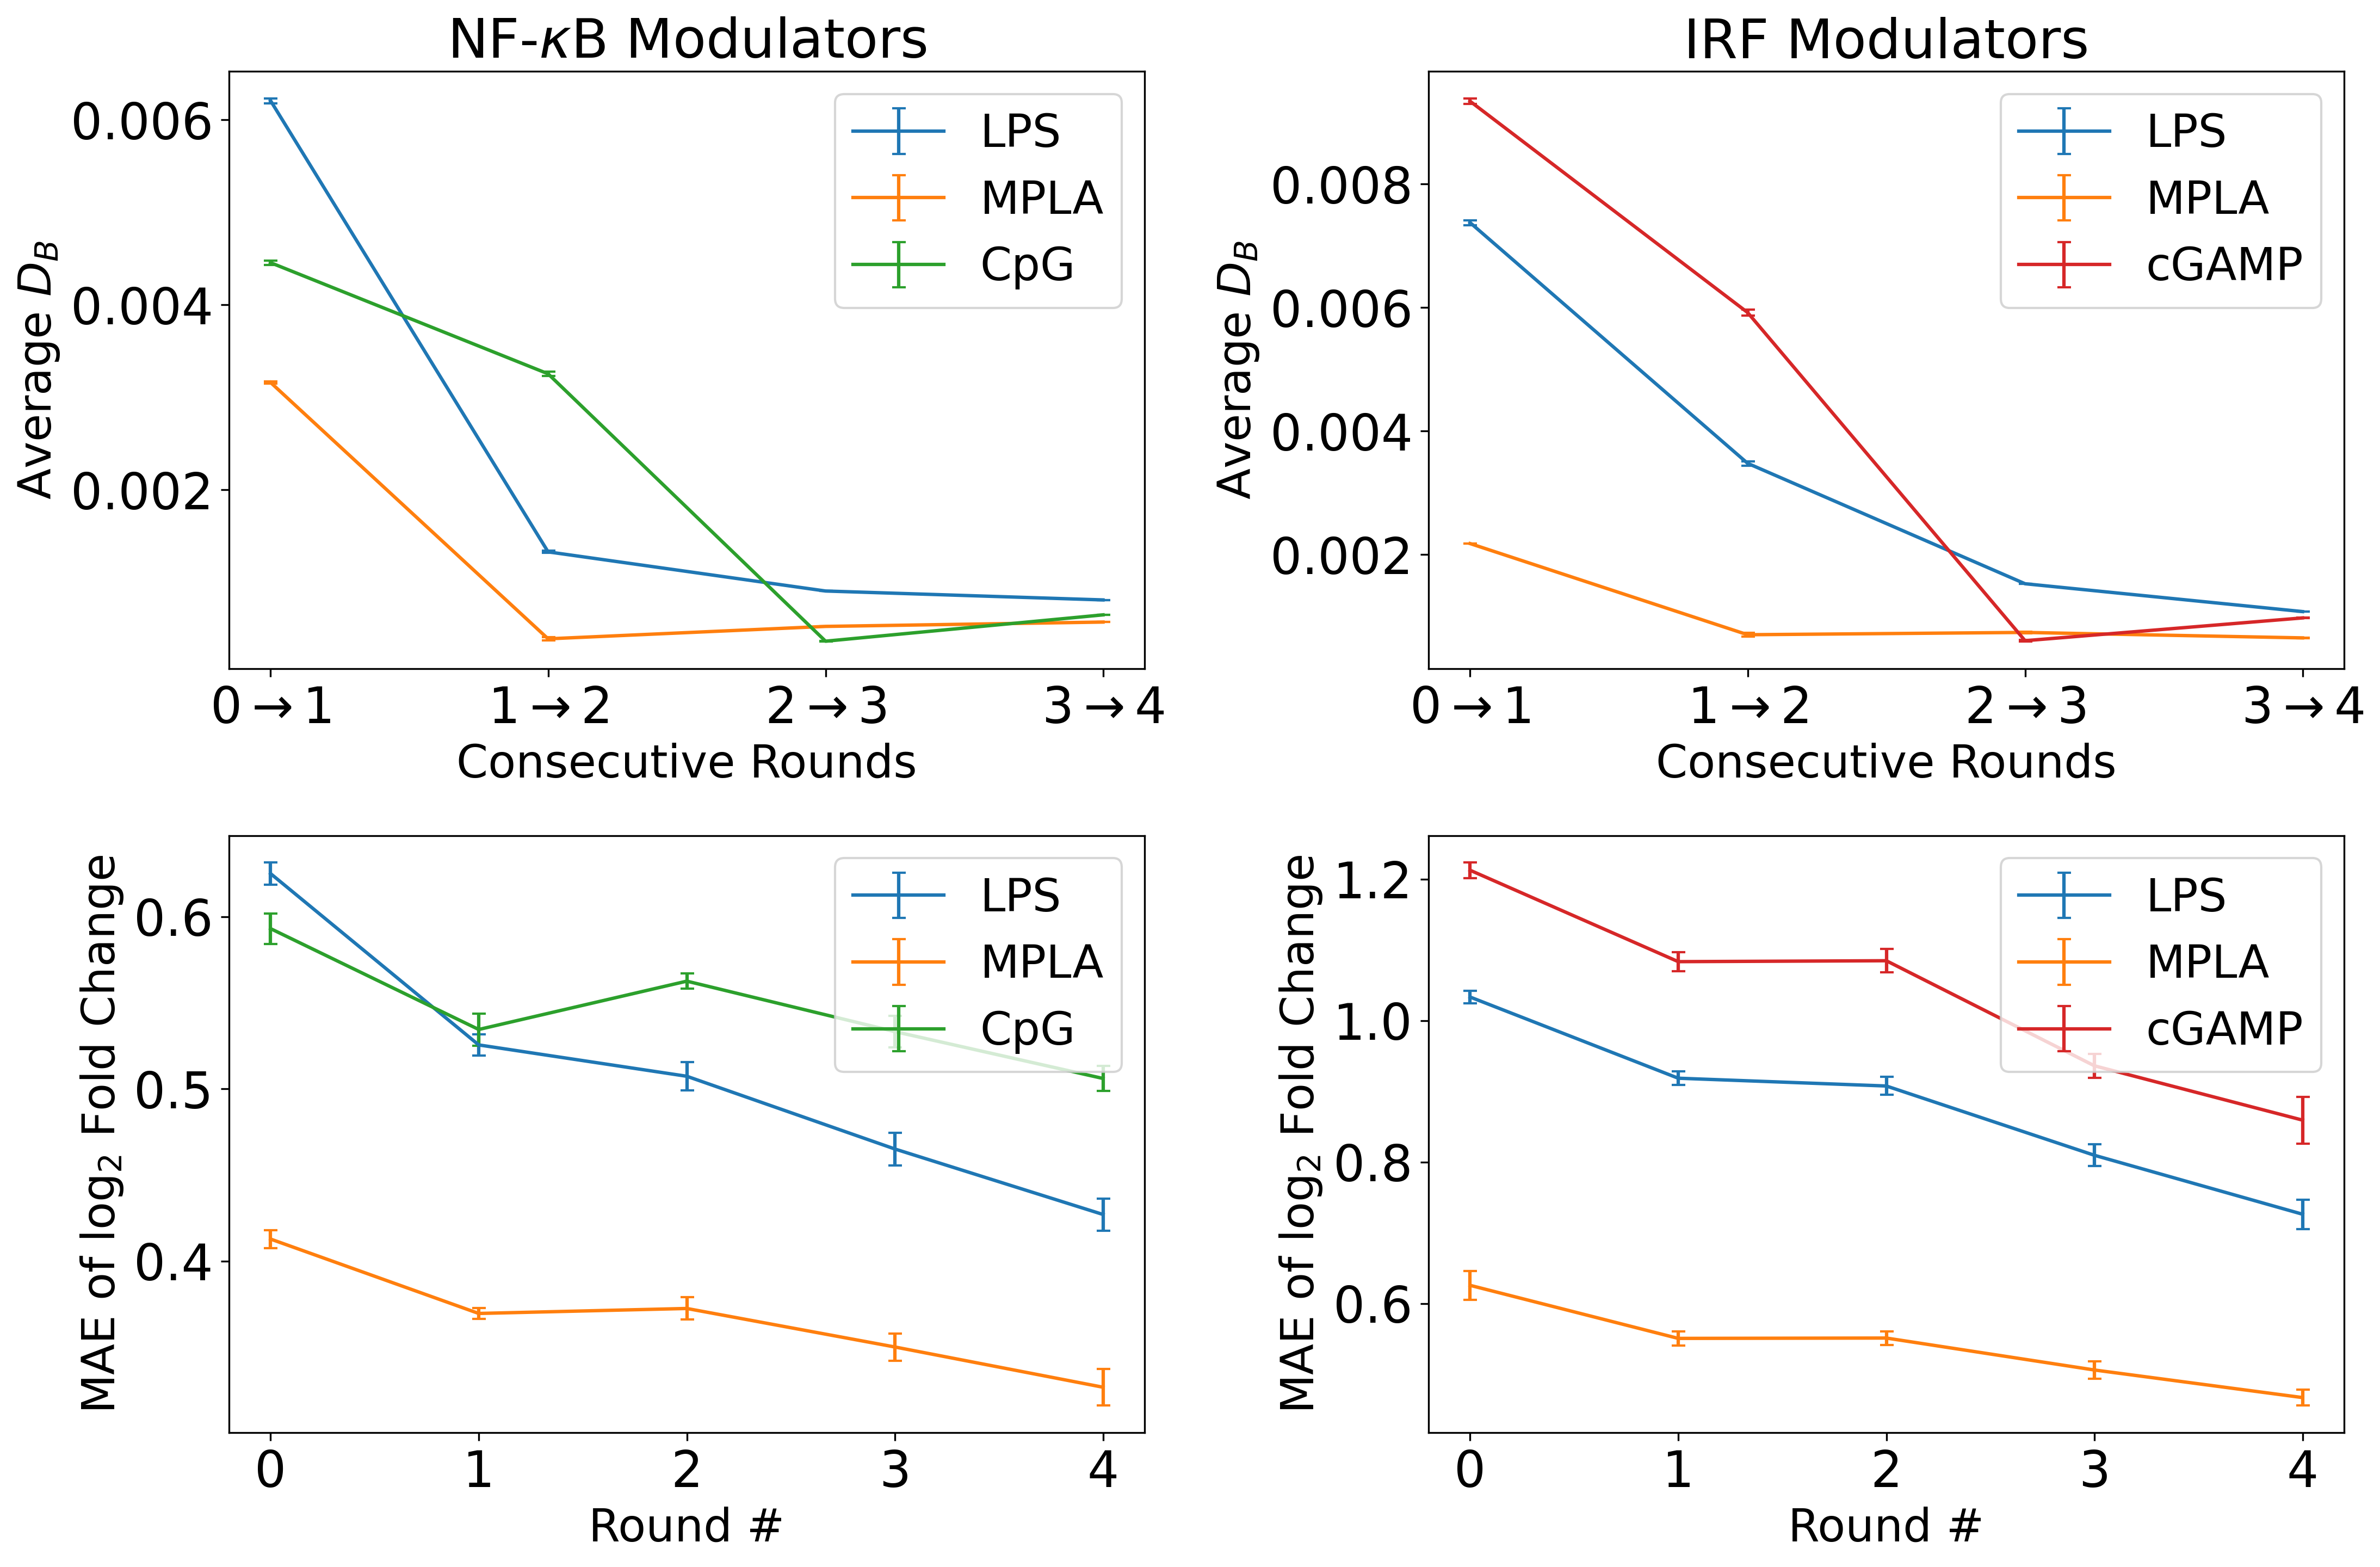

In [16]:
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9,9), dpi=300)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10), dpi=300)
fs = 20
lfs = 20
plt.rcParams.update({'font.size': fs})

for model in nfkb_list:
    data = np.loadtxt(f'{dirpath}/logDB-100000/'+'_'.join(model)+'.txt')
    yerr = np.loadtxt(f'{dirpath}/logDB-100000/'+'_'.join(model)+'-sem.txt')
    ax = axs[0,0]
    ax.errorbar([1,2,3,4], data, yerr, label=model[2], c=cm[model[2]], capsize=3)
ax.set_xlabel('Consecutive Rounds', fontsize=lfs)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['0$\\rightarrow$1','1$\\rightarrow$2','2$\\rightarrow$3','3$\\rightarrow$4'], fontsize=lfs)
ax.set_ylabel('Average $D_B$', fontsize=lfs)
# ax.set_title('Stablized Predictions of Consecutive GPR Models\nfor NF-$\kappa$B Modulators')
ax.set_title('NF-$\kappa$B Modulators')
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=22)


for model in irf_list:
    data = np.loadtxt(f'{dirpath}/logDB-100000/'+'_'.join(model)+'.txt')
    yerr = np.loadtxt(f'{dirpath}/logDB-100000/'+'_'.join(model)+'-sem.txt')
    ax = axs[0,1]
    ax.errorbar([1,2,3,4], data, yerr, label=model[2], c=cm[model[2]], capsize=3)
ax.set_xlabel('Consecutive Rounds', fontsize=lfs)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['0$\\rightarrow$1','1$\\rightarrow$2','2$\\rightarrow$3','3$\\rightarrow$4'], fontsize=lfs)
ax.set_ylabel('Average $D_B$', fontsize=lfs)
ax.set_title('IRF Modulators')
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=22)

for model in nfkb_list:
    data = np.loadtxt(f'{dirpath}/logMAE/'+'_'.join(model)+f'_0.txt').reshape(-1, 1)
    for round in ['A', 'B', 'C', 'D']:
        data = np.concatenate((data, np.loadtxt(f'{dirpath}/logMAE/'+'_'.join(model)+f'_{round}.txt').reshape(-1, 1)), axis=1)
    y = - np.mean(data, axis=0)
    yerr = np.std(data, axis=0) / np.sqrt(5)
    ax = axs[1,0]
    ax.errorbar([0,1,2,3,4], y, yerr, label=model[2], c=cm[model[2]], capsize=3)
ax.set_xlabel('Round #', fontsize=lfs)
ax.set_xticks([0,1,2,3,4])
ax.set_ylabel('MAE of log$_2$ Fold Change', fontsize=lfs)
ax.legend(loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=22)

for model in irf_list:
    data = np.loadtxt(f'{dirpath}/logMAE/'+'_'.join(model)+f'_0.txt').reshape(-1, 1)
    for round in ['A', 'B', 'C', 'D']:
        data = np.concatenate((data, np.loadtxt(f'{dirpath}/logMAE/'+'_'.join(model)+f'_{round}.txt').reshape(-1, 1)), axis=1)
    y = - np.mean(data, axis=0)
    yerr = np.std(data, axis=0) / np.sqrt(5)
    ax = axs[1,1]
    ax.errorbar([0,1,2,3,4], y, yerr, label=model[2], c=cm[model[2]], capsize=3)
ax.set_xlabel('Round #', fontsize=lfs)
ax.set_xticks([0,1,2,3,4])
ax.set_ylabel('MAE of log$_2$ Fold Change', fontsize=lfs)
ax.legend(loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=22)

# Place Letter Labels
# for i in range(2):
#     ax = axs[i,0]
#     ax.text(-0.22,1.2, ['A', 'B'][i],  transform=ax.transAxes, fontsize=30, fontweight='bold', va='top')

plt.rcParams.update({'font.size': fs})

plt.tight_layout()
# plt.savefig('gpr-all.pdf')
# plt.savefig('gpr-all.png')
# plt.savefig('gpr-all.svg')
plt.savefig('Fig2C.svg')